### Bayes Classifier (Optimal) 



P( $\omega_{j}$ | X = x) = P(X = x | $\omega_{j}$ ) * P( $\omega_{j}$ ) / P(X=x) 

Given , $\omega_{j}  \in $  {0,1}  <br>
        $ P( \omega_{j} = 0) = 0.95$ <br>
        **Posterior are normally distributed as :** <br>
        $ P(X = x | \omega_{j} = 0  )$ ~ <i>N</i>(0,1) <br>
        $ P(X = x | \omega_{j} = 1  )$ ~ <i>N</i>(1,1)

#### (Optimal) Bayes Classifier under 0-1 loss function is one that choose class $ \omega_{j} $ which maximizes posterior probability P( $\omega_{j}$ | X = x)

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Fixed variables**

In [23]:
N = 10000
p0 = 0.95 
mu_0, mu_1 = 0., 1. 
var_0 = var_1 =  sigma = 1.

In [3]:
def normal(mean, var, X): 
    return np.exp( -(X-mean)**2 / ( 2* var**2 ) )/ np.sqrt(2*np.pi*var)

def prior(omega_j): 
    if omega_j == 0 : 
        return p0 
    return (1 - p0)

def class_conditional(X,omega_j): 
    if omega_j == 0 : 
        y = normal(mu_0,var_0,X)
    else : 
        y = normal(mu_1,var_1,X)
    return y

def posterior_prob(X, omega_j) :
    return class_conditional(X,omega_j)*prior(omega_j)

def predict_class(X): 
    boolean = posterior_prob(X,1) > posterior_prob(X,0)
    if boolean : 
        return 1 
    return 0         

In [21]:
# Generate dummy data 

def one_simulation(): 
    global N 
    data = []
    true_labels = []
    for i in range(N): 
        label = np.random.choice([0,1], p=[p0,1-p0])
        if label == 0 : 
            x = np.random.normal(mu_0,var_0)
        else : 
            x = np.random.normal(mu_1, var_1)
        data.append(x)
        true_labels.append(label)

    # Test our Classifier 
    pred_labels = []
    for i in range(N): 
        pred = predict_class(data[i])
        pred_labels.append(pred)
    
    # Q-1 False Positive FP
    FP = [1 if ( pred_labels[i] == 0  and true_labels[i] == 1 ) else 0 for i in range(N)]
    FP = sum(FP)
    
    # Q-2 True Positive TP
    TP = [1 if (pred_labels[i] == 1 and true_labels[i]==1) else 0 for i in range(N) ]
    TP = sum(TP)
    
    # Q-3 Accuracy
    acc = [1. if pred_labels[i] == true_labels[i] else 0 for i in range(N)]
    acc = sum(acc)/N
    
    return FP, TP, acc
    
def n_simulation(n): 
    res = [ [], [], []]
    for i in range(n): 
        FP,TP,acc = one_simulation()
        res[0].append(FP)
        res[1].append(TP)
        res[2].append(acc)
    return np.array(res)

    

In [22]:
def find_scale(L): 
    scale = 0
    minL = min([ e for e in L if e != 0] )
    while True : 
        if minL < 1 : 
            break
        scale += 1 
        minL = minL/10
    return scale

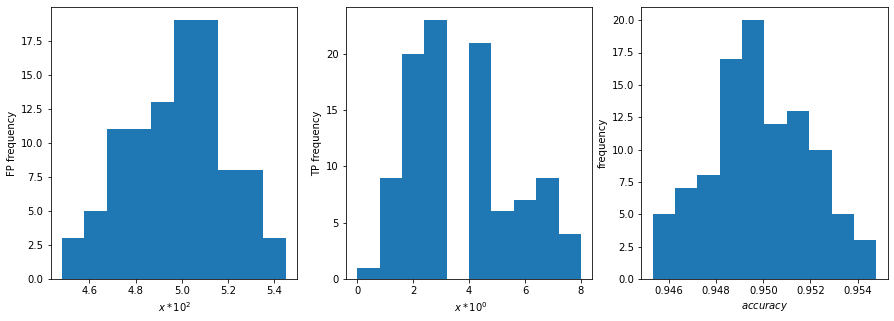

False Positive FP in every 10000 samples : 499
True  Positive TP in every 10000 samples : 4
Accuracy : 0.949849


In [18]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

FP, TP, acc = n_simulation(100)

fp_scale , tp_scale  = find_scale(FP)-1, find_scale(TP)-1
FP = FP/(10**fp_scale)
TP = TP/(10**tp_scale)

axes[0].hist(FP)
axes[0].set_xlabel(' $ x * 10^%d$'%fp_scale)
axes[0].set_ylabel('FP frequency')


axes[1].hist(TP)
axes[1].set_xlabel(' $ x * 10^%d$'%tp_scale)
axes[1].set_ylabel('TP frequency')

axes[2].hist(acc)
axes[2].set_xlabel('$ accuracy $ ')
axes[2].set_ylabel('frequency')

plt.show()

FP = np.mean(FP)*(10**fp_scale)
TP = np.mean(TP)*(10**tp_scale)
acc_mean = np.mean(acc)
print(f"False Positive FP in every %d samples : %d"%(N,round(FP)))
print(f"True  Positive TP in every %d samples : %d"%(N,round(TP)))
print(f"Accuracy : %f"%acc_mean)

### Neyman Pearson Classifier

Threshold : $\alpha$
$$
h_{NP}(X)
= 
\begin{cases}
1 \text{ if } f_{1}(X)/f_{0}(X) > K\\
0  \text{ otherwise} 
\end{cases}
$$

where K is chosen s.t. 

$P(f_{1}(X)/f_{0}(X) <= K | X \in C_0 ) = 1 - \alpha$

For binary classification problem where distribution are 1-D gaussian, on simplication we get $\tau$ s.t. our classifier become this 

$$
h_{NP}(X)
= 
\begin{cases}
1 \text{ if } X > \tau \\
0  \text{ otherwise} 
\end{cases}
$$

where $\tau$ = $\sigma * \phi^{-1}(1 - \alpha) + \mu_{ 0} $




**Import required libraries**

In [24]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

**Generate dataset**

In [25]:
# Global variables 
mu_0, mu_1 = 0, 1 
var_0 = var_1 = sigma =  1
p0 = 0.95
N = 10000

def generate_data() : 
    data = []
    true_labels = []
    for i in range(N): 
        z_i = np.random.choice([0,1],p=[p0,1-p0])
        true_labels.append(z_i)
        mu = mu_0 if z_i == 0 else mu_1
        var = var_0 if z_i == 0 else var_1 
        point = np.random.normal(mu,var)
        data.append(point)
    return data, true_labels

In [26]:
def NP_classifier(tau):
    
    global N 
    
    data, y_true = generate_data()
    predictions = []
    
    for i in range(N): 
        X = data[i]
        if X > tau : 
            predictions.append(1)  # class 1 
        else : 
            predictions.append(0) # class 0 
    
    # Calculate Type I and Type II errors 
    
    # Type-I : P(h_NP(X) = 1 | X ∈ C_0 )
    num_type_1 = [1  for i in range(N)  if y_true[i]==0 and predictions[i]==1 ]
    den_type_1 = [1 for i in range(N) if y_true[i]==0 ]
    type_1 = sum(num_type_1)/sum(den_type_1)
    
    # Type-II : P(h_NP(X) = 0 | X ∈ C_1 )
    num_type_2 = [1 for i in range(N) if y_true[i]==1 and predictions[i]==0]
    den_type_2 = [1 for i in range(N) if y_true[i]==1]
    type_2 = sum(num_type_2)/sum(den_type_2)
    
    return type_1, type_2

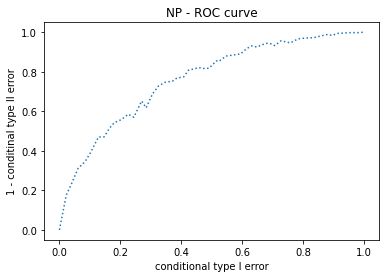

In [27]:
alphas = np.linspace(0,1,50)

ROC = [ [], []]
for alpha in alphas : 
    tau = sigma*norm.ppf(1 - alpha) + mu_0  # reference used : https://youtu.be/B1g4FN9eAuA?t=2957
    type_1, type_2 = NP_classifier(tau)
    ROC[0].append(type_1)
    ROC[1].append(1-type_2)
        
plt.plot(ROC[0],ROC[1],linestyle=':')

plt.title('NP - ROC curve')
plt.xlabel('conditional type I error')
plt.ylabel('1 - conditinal type II error')
plt.show()


### Min Max Classifier 

A min-max classifier is a classifier in which risk is made independent of priors by choosing suitable threshold $\tau$

Mathematically , In binary classification , such $\tau$ will satisfy the follwing condition : 

$\tau$ = $\underset{t : t \in R }{\operatorname{argmin}}$ max P(error)

on simplication we get $\tau$ satisfies follwing condition

$\int_{\tau}^\inf f_{0}(x)dx$  = $\int_{-\inf}^\tau f_{0}(x)dx$

**Import required libraries**

In [28]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

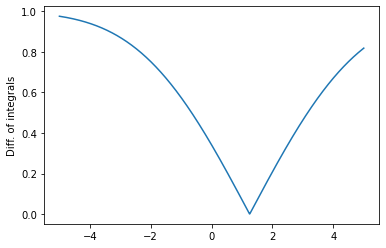

Optimal Tau : 1.246246


In [29]:
mu_0, mu_1 = 0, 1
var_0 = var_1 = sigma = 1 

taus = np.linspace(-2,2,1000)
errors = []
x = np.linspace(-5,5,1000)
for tau in taus : 
    integral_1 = 1- norm.cdf(tau,mu_0,var_0)
    integral_2 = norm.cdf(tau,mu_1, var_1)
    diff = abs(integral_2 - integral_1)
    errors.append(diff)


plt.plot(x,errors)
plt.ylabel('Diff. of integrals')
plt.show()

tau_opt = x[np.argmin(errors)]  # Optimal Tau
print("Optimal Tau : %f"%tau_opt)

In [30]:
# Make predictions 

def one_experiment() : 
    data, y_true = generate_data()
    predictions = []
    for i in range(N): 
        X = data[i]
        if X > tau_opt : 
            predictions.append(1)  # class 1 
        else : 
            predictions.append(0) # class 0 

    accuracy = [ 1 if predictions[i] == y_true[i] else 0 for i in range(N)]
    acc = sum(accuracy)/len(accuracy)*100
    return acc 

def n_experiments(n):
    acc_list = []
    for i in range(n): 
        acc = one_experiment()
        acc_list.append(acc)
    return acc_list

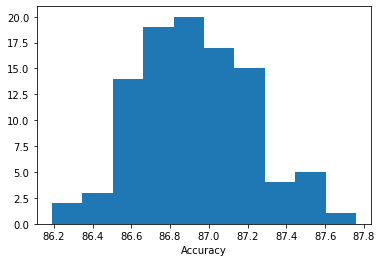

In [31]:
acc_list = n_experiments(100)
plt.xlabel('Accuracy')
plt.hist(acc_list)
plt.show()